The goal is to predict salaries based on a person's years of experience.**bold text**

In [9]:
#Data Set import into google colab
from google.colab import files

#data management & basic modules
import pandas as pd
import numpy as np
from math import sqrt

#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#Graphing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Here we install Kaggle
!pip install -q kaggle
#Use the Files.upload feature
files.upload()
#Make a directory/folder for the kaggle.json
!mkdir ~/.kaggle
#Copy the Kaggle.json
!cp kaggle.json ~/.kaggle/
#Set edit permissions
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
#Downloading the dataset
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression

  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 1.18MB/s]


In [4]:
#Make a directory/folder called data for saving the dataset and then unzip it
!mkdir data
!unzip salary-dataset-simple-linear-regression -d data
#Checking the data
!ls -lh data

Archive:  salary-dataset-simple-linear-regression.zip
  inflating: data/Salary_dataset.csv  
total 4.0K
-rw-r--r-- 1 root root 664 Jan 10  2023 Salary_dataset.csv


In [5]:
#Dropping missing values after reading the dataset
df = pd.read_csv("/content/data/Salary_dataset.csv")
df.dropna(inplace = True)

In [6]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [11]:
#The input features and target features are being prepared
X = df[['YearsExperience']]
X.columns = ['YearsExperience']
y = df['Salary']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

In [13]:
#Here I am joining have the train data be combined with the y_train as there is only X_train
train_data = X_train.join(y_train)

In [14]:
train_data

,YearsExperience,Salary
26,9.6,116970.0
16,5.2,66030.0
4,2.3,39892.0
18,6.0,81364.0
20,6.9,91739.0
25,9.1,105583.0
29,10.6,121873.0
21,7.2,98274.0
23,8.3,113813.0
15,5.0,67939.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

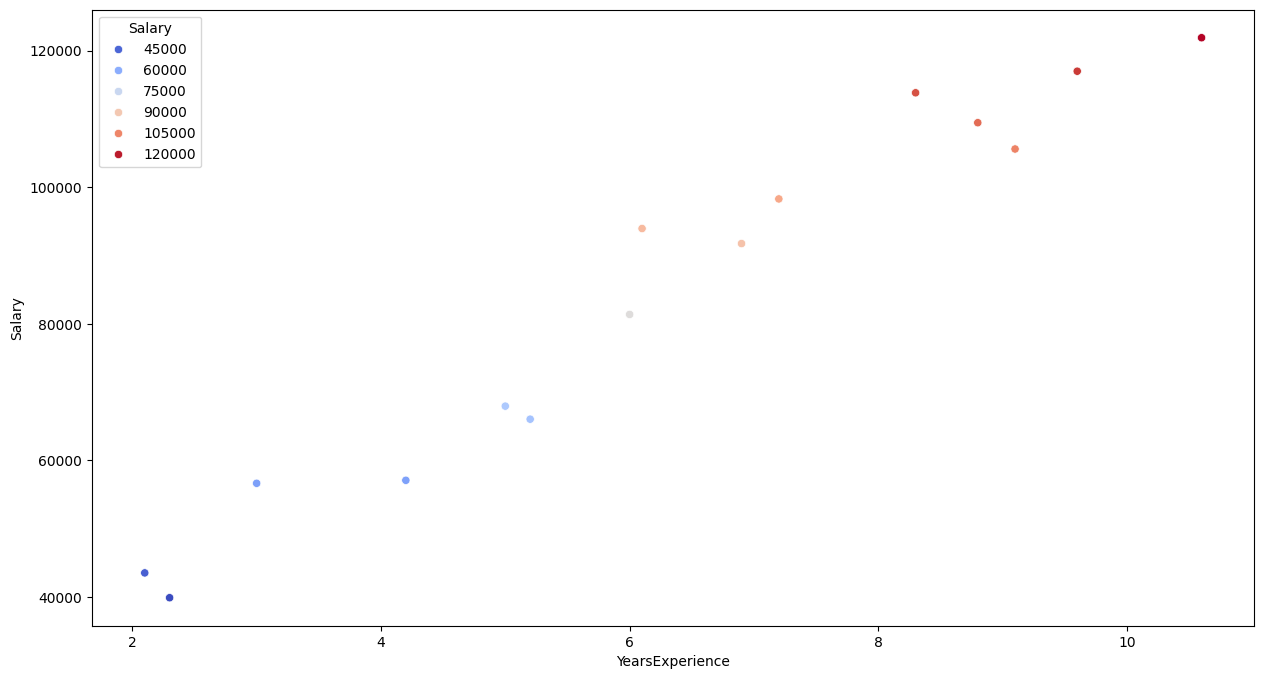

In [18]:
#Here we created a scatterplot to represent the house prices based on where they were, meaning if they were near the bottom it would be expensive but if they are at the top it is not expensive.
plt.figure(figsize=(15, 8))
sns.scatterplot(x="YearsExperience", y="Salary", data=train_data, hue="Salary", palette= "coolwarm")

Here we can see that as the number of years increase thge salaries also increase.

In [20]:
#The linear regression model is being created
LinReg = LinearRegression(fit_intercept=True)
#Model is being fitted
LinReg.fit(X_train,y_train)

LinearRegression()

In [31]:
#Coefficients are being inputted and are being outputted
coefficients = LinReg.coef_
print(f"Coefficients: {coefficients}")

Coefficients: [9449.96232146]


In [22]:
#Predictions
new_X = [[6], [12], [18]]
predictions = LinReg.predict(new_X)
print(predictions)

[ 81341.83085731 141305.74513962 201269.65942192]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
# Get the train and test results
y_train_pred = LinReg.predict(X_train)
y_test_pred = LinReg.predict(X_test)

# Print the results
print('Train R-squared:', LinReg.score(X_train, y_train))
print('Test R-squared:', LinReg.score(X_test, y_test))

Train R-squared: 0.9515988480363982
Test R-squared: 0.9534956787070664


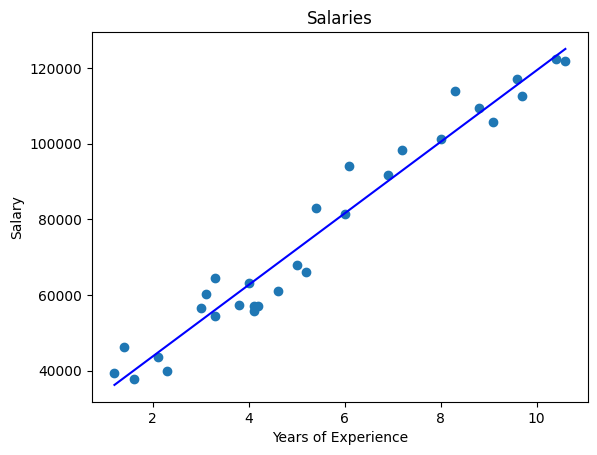

In [32]:
#The data is being visualized as well as the predictions
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, LinReg.predict(X), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salaries')
plt.show()

Here I have updated this and included a few more models using different algorithms.

In [33]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree

In [34]:
# Create the decision tree regressor model
regressor = DecisionTreeRegressor()
# Train the model on the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
# Make predictions on the training and test sets
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)

# Print the results
print("Training accuracy:", train_accuracy*100)
print("Test accuracy:", test_accuracy*100)

Training accuracy: 100.0
Test accuracy: 92.85490106287585


[Text(0.43478260869565216, 0.9166666666666666, 'x[0] <= 5.6\nsquared_error = 701908240.373\nsamples = 15\nvalue = 84273.4'),
 Text(0.1956521739130435, 0.75, 'x[0] <= 2.65\nsquared_error = 109301840.556\nsamples = 6\nvalue = 55185.333'),
 Text(0.08695652173913043, 0.5833333333333334, 'x[0] <= 2.2\nsquared_error = 3301489.0\nsamples = 2\nvalue = 41709.0'),
 Text(0.043478260869565216, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 43526.0'),
 Text(0.13043478260869565, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 39892.0'),
 Text(0.30434782608695654, 0.5833333333333334, 'x[0] <= 4.6\nsquared_error = 26093346.25\nsamples = 4\nvalue = 61923.5'),
 Text(0.21739130434782608, 0.4166666666666667, 'x[0] <= 3.6\nsquared_error = 48180.25\nsamples = 2\nvalue = 56862.5'),
 Text(0.17391304347826086, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 56643.0'),
 Text(0.2608695652173913, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 57082.0'),
 Text(0.391304347826087, 0

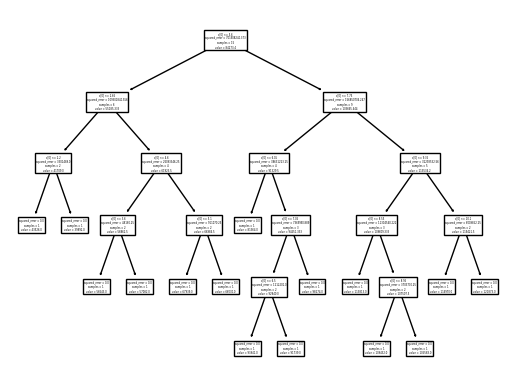

In [36]:
#Here we plot the decision tree which is not perfectly able to be seen but can be seen in the pdf version/format that is set
sklearn.tree.plot_tree(regressor)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
#Here we set up the random forest regressor and store it as a variable
forest = RandomForestRegressor()
#Here we pass in the train values
forest.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
# Make predictions on the training and test sets
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = forest.score(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)

# Print the results
print("Training accuracy:", train_accuracy*100)
print("Test accuracy:", test_accuracy*100)

Training accuracy: 98.83726869227439
Test accuracy: 94.0341108738809
